In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('UK_foods.csv',index_col='Unnamed: 0')

In [3]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [5]:
df = df.transpose()

In [6]:
df

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [13]:
len(df.columns)

17

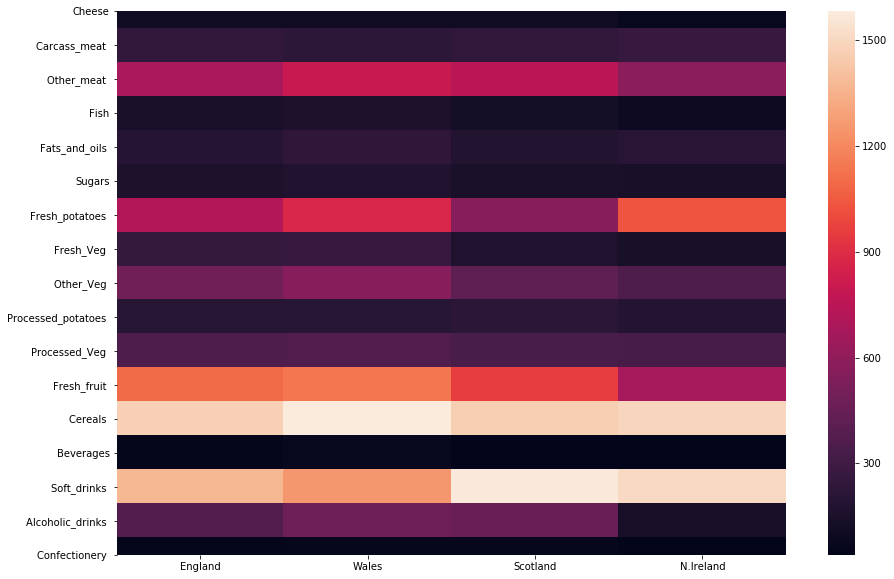

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df.transpose())

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
encoder=Sequential()
encoder.add(Dense(8,activation='relu',input_shape=[17]))
encoder.add(Dense(4,activation='relu'))
encoder.add(Dense(2,activation='relu'))

In [16]:
decoder=Sequential()
decoder.add(Dense(4,activation='relu',input_shape=[2]))
decoder.add(Dense(8,activation='relu'))
decoder.add(Dense(17,activation='relu'))

In [17]:
autoencoder=Sequential([encoder,decoder])

In [18]:
from tensorflow.keras.optimizers import SGD

In [19]:
autoencoder.compile(loss='mse',optimizer=SGD(lr=1.5))

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(df)

In [23]:
pd.DataFrame(scaled_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000000,0.450,0.456221,0.805970,0.176471,0.472222,0.329764,0.901639,0.618605,0.333333,0.838710,0.924406,0.083333,0.384615,0.373418,0.705882,0.565217
1,0.948718,0.000,1.000000,1.000000,1.000000,1.000000,0.659529,1.000000,1.000000,0.484848,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
2,0.948718,0.375,0.755760,0.432836,0.000000,0.222222,0.000000,0.229508,0.293023,1.000000,0.096774,0.611231,0.000000,0.230769,1.000000,0.950000,0.913043
3,0.000000,1.000,0.000000,0.000000,0.490196,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266667,0.000000,0.791139,0.000000,0.000000


In [24]:
autoencoder.fit(scaled_data,scaled_data,epochs=15)

Train on 4 samples
Epoch 1/15
4/4 [==============================] - 3s 661ms/sample - loss: 0.4268
Epoch 2/15
4/4 [==============================] - 0s 3ms/sample - loss: 0.3559
Epoch 3/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.3092
Epoch 4/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.2854
Epoch 5/15
4/4 [==============================] - 0s 2ms/sample - loss: 0.2740
Epoch 6/15
4/4 [==============================] - 0s 997us/sample - loss: 0.2688
Epoch 7/15
4/4 [==============================] - 0s 997us/sample - loss: 0.2664
Epoch 8/15
4/4 [==============================] - 0s 998us/sample - loss: 0.2653
Epoch 9/15
4/4 [==============================] - 0s 499us/sample - loss: 0.2647
Epoch 10/15
4/4 [==============================] - 0s 747us/sample - loss: 0.2644
Epoch 11/15
4/4 [==============================] - 0s 748us/sample - loss: 0.2641
Epoch 12/15
4/4 [==============================] - 0s 997us/sample - loss: 0.2640
Epoch 13/15
4/

In [25]:
encoded_data=encoder.predict(scaled_data)

In [26]:
encoded_data

array([[0.        , 0.40347168],
       [0.        , 0.5745875 ],
       [0.        , 0.07958384],
       [0.        , 0.        ]], dtype=float32)

In [27]:
df.index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [28]:
results = pd.DataFrame(data=encoded_data,index=df.index,
                      columns=['C1','C2'])

In [32]:
results=results.reset_index()

In [33]:
results

,index,C1,C2
0,England,0.0,0.403472
1,Wales,0.0,0.574588
2,Scotland,0.0,0.079584
3,N.Ireland,0.0,0.000000


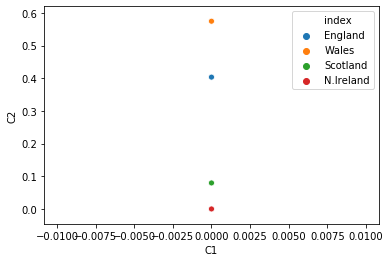

In [34]:
sns.scatterplot(x='C1',y='C2',data=results,hue='index')